<a href="https://colab.research.google.com/github/WhiteJaeger/googleColab/blob/master/Lab_3%2C_IAD%2C_Kashchikhin_Andrej.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа #3

Работа с GeoNamesCache & Basemap

In [1]:
# Установка Basemap

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (54.2 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pr

In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib

In [0]:
map_plotter = Basemap()

## Работа с данными

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
!ls -la ./drive/My\ Drive/Colab\ Notebooks/headlines.txt

-rw------- 1 root root 27159 Jun 11 13:27 './drive/My Drive/Colab Notebooks/headlines.txt'


In [7]:
# Загрузка данных

with open('./drive/My Drive/Colab Notebooks/headlines.txt', 'r') as f:
  d = [line.strip() for line in f]

print(d)

['Zika Outbreak Hits Miami', 'Could Zika Reach New York City?', 'First Case of Zika in Miami Beach', 'Mystery Virus Spreads in Recife, Brazil', 'Dallas man comes down with case of Zika', 'Trinidad confirms first Zika case', 'Zika Concerns are Spreading in Houston', 'Geneve Scientists Battle to Find Cure', 'The CDC in Atlanta is Growing Worried', 'Zika Infested Monkeys in Sao Paulo', 'Brownsville teen contracts Zika virus', 'Mosquito control efforts in St. Louis take new tactics with Zika threat', 'San Juan reports 1st U.S. Zika-related death amid outbreak', 'Flu outbreak in Galveston, Texas', 'Zika alert – Manila now threatened', 'Zika afflicts 7 in Iloilo City', 'New Los Angeles Hairstyle goes Viral', 'Louisiana Zika cases up to 26', 'Orlando volunteers aid Zika research', 'Zika infects pregnant woman in Cebu', "Chicago's First Zika Case Confirmed", 'Tampa Bay Area Zika Case Count Climbs', 'Bad Water Leads to Sickness in Flint, Michigan', 'Baltimore plans for Zika virus', 'London Heal

In [8]:
data = pd.DataFrame(columns=['location'])

data['location'] = d

data.shape

(650, 1)

In [0]:
# Функция из второй лабораторной - соберём кусочно из регулярок.

import re

def cleanText(text: str) -> str:
    
    text = re.sub(r"\n", "",  text)
    text = re.sub(r"[-()]", "", text)
    text = re.sub(r"\.", " .", text)
    text = re.sub(r"\!", " !", text)
    text = re.sub(r"\?", " ?", text)
    text = re.sub(r"\,", " ,", text)
    text = re.sub(r"[^a-zA-Z0-9]+", ' ', text)
    
    return text

In [0]:
# Очистка данных
data['location'] = data.location.apply(lambda line: cleanText(line))

In [0]:
data.head()

,location
0,Zika Outbreak Hits Miami
1,Could Zika Reach New York City
2,First Case of Zika in Miami Beach
3,Mystery Virus Spreads in Recife Brazil
4,Dallas man comes down with case of Zika


## Извлечение локаций из сырых данных

In [11]:
!pip install geonamescache

     |████████████████████████████████| 839kB 2.7MB/s 


In [0]:
from geonamescache import GeonamesCache
gc = GeonamesCache()

In [13]:
# Для извлечение будет использоваться библиотека geotext,
# к-я позволяет из относительно сырых данных извлечь именованные сущности локаций

!pip install geotext

from geotext import GeoText

     |████████████████████████████████| 2.0MB 2.7MB/s 


In [0]:
places = GeoText(' '.join([line for line in data.location]))

In [15]:
# Посмотрим, что удалось вычленить

print(places.cities)
print(len(places.cities))
print(places.countries)

# В общей сложности - 201 город.
# Использовать страны не имеет смысла, т.к. их слишком мало.

['Miami Beach', 'Dallas', 'Atlanta', 'Brownsville', 'San Juan', 'Manila', 'Orlando', 'Baltimore', 'Philadelphia', 'Paris', 'San Diego', 'Mandaluyong City', 'Santa Rosa', 'San Salvador', 'Lima', 'Toronto', 'Key West', 'Nashville', 'Croix', 'Fort Collins', 'Guatemala City', 'Madison', 'Entebbe', 'Caracas', 'Mumbai', 'Pune', 'Hanoi', 'Silver Spring', 'Belize City', 'Mexico City', 'Rochester', 'Salt Lake', 'San Antonio', 'Belo Horizonte', 'Antipolo', 'Vero Beach', 'Buenos Aires', 'Majuro', 'Spring', 'Fort Lauderdale', 'Villavicencio', 'Kota Kinabalu', 'Johor Bahru', 'Charlotte', 'Bacolod City', 'San Juan', 'Spokane', 'Rio Grande', 'Baton Rouge', 'Corpus Christi', 'Lemon Grove', 'Huntsville', 'Panama City', 'Escondido', 'Veracruz', 'Syracuse', 'Raleigh', 'Auckland', 'Strasbourg', 'Fresno', 'Kansas City', 'Cambridge', 'Lafayette', 'Mecca', 'San Benito', 'North Miami', 'Tunapuna', 'Mandalay', 'Rockville', 'Arcadia', 'Valdosta', 'Coral Gables', 'Chula Vista', 'Las Vegas', 'Daytona Beach', 'San

In [17]:
# Посмотрим, может ли GeoNamesCache распознать,
# + посмотрим на то, как представлены данные.

print(gc.get_cities_by_name('Wichita Falls'))

print(type(gc.get_cities_by_name('Wichita Falls')))

print(len(gc.get_cities_by_name('Wichita Falls')))

[{'4741752': {'geonameid': 4741752, 'name': 'Wichita Falls', 'latitude': 33.91371, 'longitude': -98.49339, 'countrycode': 'US', 'population': 104710, 'timezone': 'America/Chicago', 'admin1code': 'TX'}}]
<class 'list'>
1


In [19]:
# Необходимая информация по городу

gc.get_cities_by_name('Wichita Falls')[0]

{'4741752': {'admin1code': 'TX',
  'countrycode': 'US',
  'geonameid': 4741752,
  'latitude': 33.91371,
  'longitude': -98.49339,
  'name': 'Wichita Falls',
  'population': 104710,
  'timezone': 'America/Chicago'}}

In [21]:
# Соберём все необходимые данные (широту + долготу) в одно место.

locationData = dict()

for name in places.cities:
  cityData = gc.get_cities_by_name(name)
  
  if not cityData: # Посмотрим, есть ли те, для которых не нашлось - или ошибки,
  # или неправильно извлеклись данные
    print(name)
    continue
  
  for dataValues in cityData[0].values():
    locationData[name] = {
        'latitude': dataValues['latitude'],
        'longitude': dataValues['longitude']
    }

print(len(locationData)) # 192 города.

# Mclean - не город, его не берём.
# Про Salt Lake - далее.

Salt Lake
Mclean
192


In [22]:
print(gc.get_cities_by_name('Salt Lake')) # Это по озеру.
print(gc.get_cities_by_name('Salt Lake City')) # А это именно город.

[]
[{'5780993': {'geonameid': 5780993, 'name': 'Salt Lake City', 'latitude': 40.76078, 'longitude': -111.89105, 'countrycode': 'US', 'population': 192672, 'timezone': 'America/Denver', 'admin1code': 'UT'}}]


In [0]:
# Возьмём город, чтобы данных было больше.

saltLakeData = gc.get_cities_by_name('Salt Lake City')[0]

locationData['Salt Lake City'] = {
    'latitude': saltLakeData['5780993']['latitude'],
    'longitude': saltLakeData['5780993']['longitude']
}

In [24]:
locationData

{'Addis Ababa': {'latitude': 9.02497, 'longitude': 38.74689},
 'Albany': {'latitude': -35.02692, 'longitude': 117.88369},
 'Alexandria': {'latitude': 31.20176, 'longitude': 29.91582},
 'Allentown': {'latitude': 40.60843, 'longitude': -75.49018},
 'Annapolis': {'latitude': 38.97845, 'longitude': -76.49218},
 'Antipolo': {'latitude': 14.62578, 'longitude': 121.12251},
 'Arcadia': {'latitude': 34.13973, 'longitude': -118.03534},
 'Atlanta': {'latitude': 33.749, 'longitude': -84.38798},
 'Auckland': {'latitude': -36.84853, 'longitude': 174.76349},
 'Avon Lake': {'latitude': 41.50532, 'longitude': -82.0282},
 'Bacolod City': {'latitude': 10.66667, 'longitude': 122.95},
 'Baku': {'latitude': 40.37767, 'longitude': 49.89201},
 'Baltimore': {'latitude': 39.29038, 'longitude': -76.61219},
 'Baton Rouge': {'latitude': 30.44332, 'longitude': -91.18747},
 'Belize City': {'latitude': 17.49952, 'longitude': -88.19756},
 'Bella Vista': {'latitude': -27.03424, 'longitude': -65.30196},
 'Belo Horizonte

## Визуализация + анализ данных

In [25]:
data = pd.DataFrame.from_dict(locationData).T
data.head()

,latitude,longitude
Miami Beach,25.79065,-80.13005
Dallas,32.78306,-96.80667
Atlanta,33.74900,-84.38798
Brownsville,25.82176,-80.24116
San Juan,-31.53750,-68.53639


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


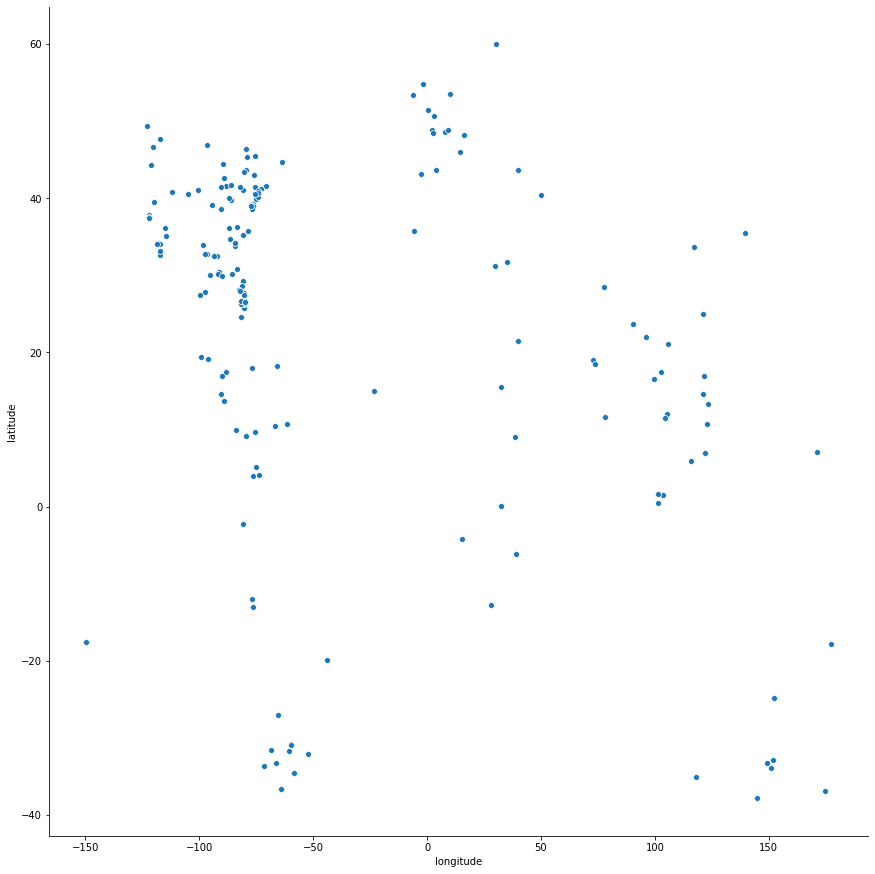

In [26]:
# Посмотрим на scatter.

sns.pairplot(x_vars="longitude", y_vars="latitude", data=data, size=12)
plt.show()

# Очень даже похоже на карту, где бол-во Северная Америка.

In [0]:
latitudes, longitudes = data['latitude'], data['longitude']

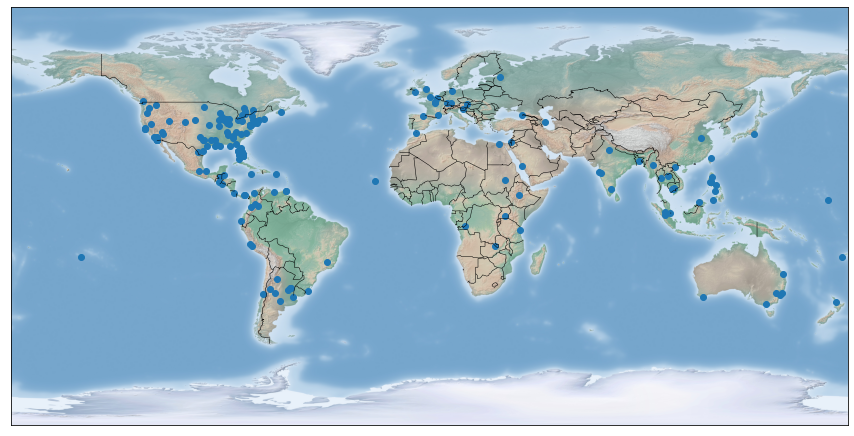

In [29]:
# Посмотрим на то же самое на карте.

fig = plt.figure(figsize=(15, 15))

map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.drawcountries()

map_plotter.shadedrelief()
plt.show()

# Боль-во из Сев. Америки, что ожидаемо, относительно много из Западной Европы;
# Жаль, что плохо представлены Африка и Азия;
# Есть и Австралия - явно отличающаяся.

## Кластеризация данных

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster

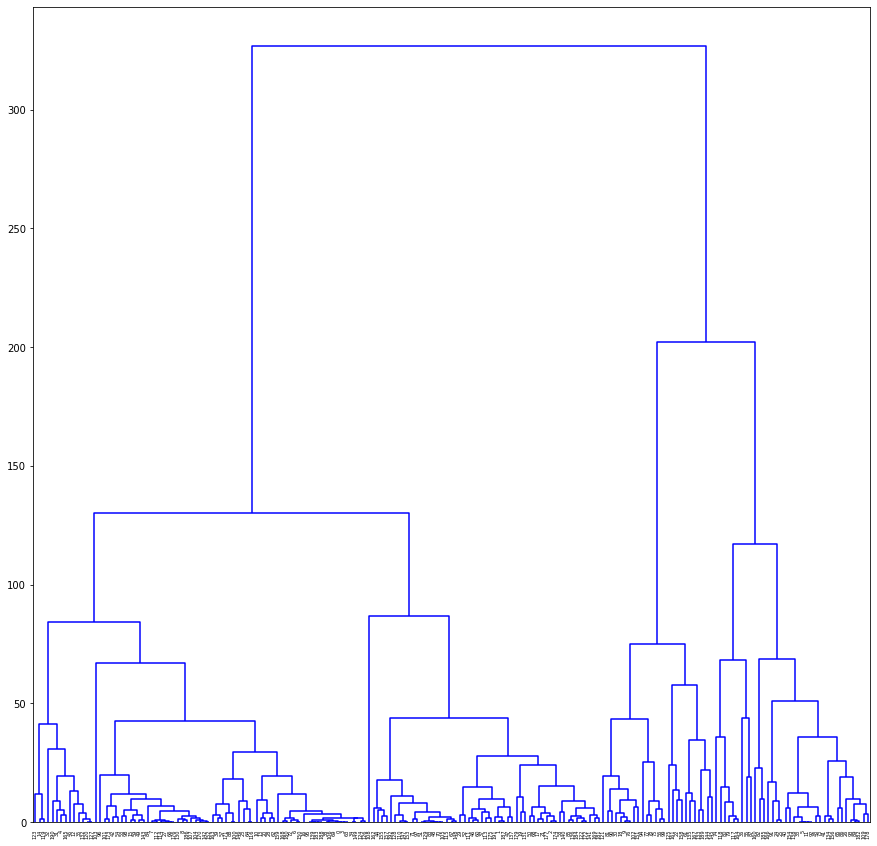

In [32]:
# Посмотрим на иерархическую кластеризацию - ближайший сосед.

Z = linkage(data, method='complete')

plt.figure(figsize=(15, 15))
dendrogram(Z, color_threshold=0)
plt.show()

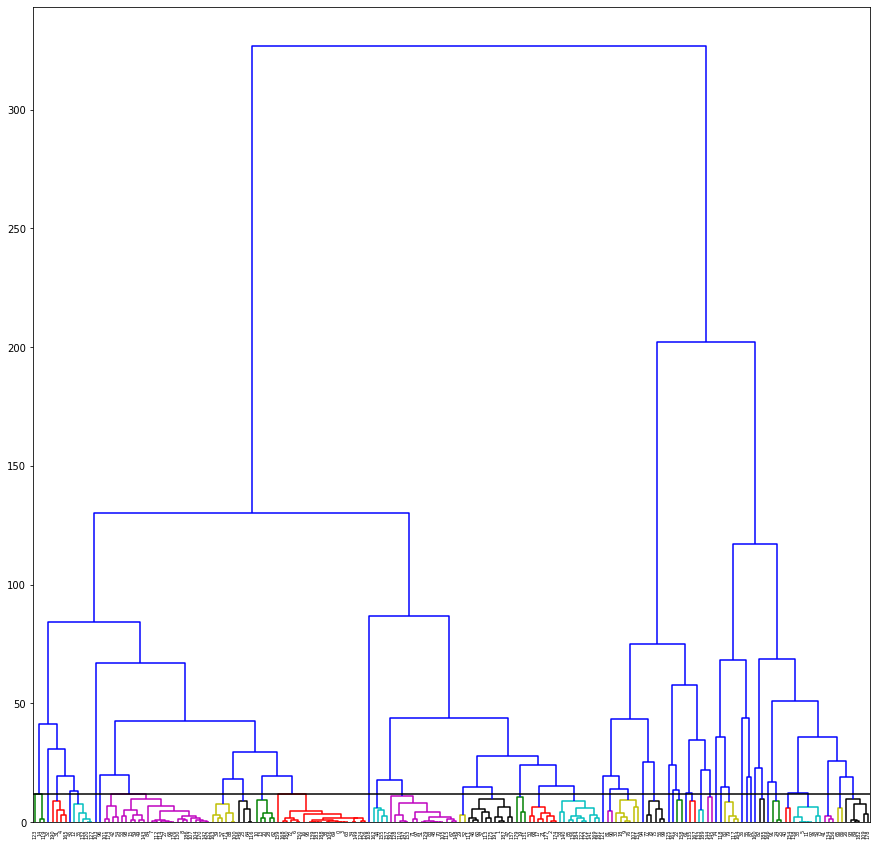

In [33]:
# Попробуем отделить.

plt.figure(figsize=(15, 15))
dendrogram(Z, color_threshold=12)
plt.axhline(y=12, c='k')
plt.show()

# Слишком сильно - больше 10 кластеров.

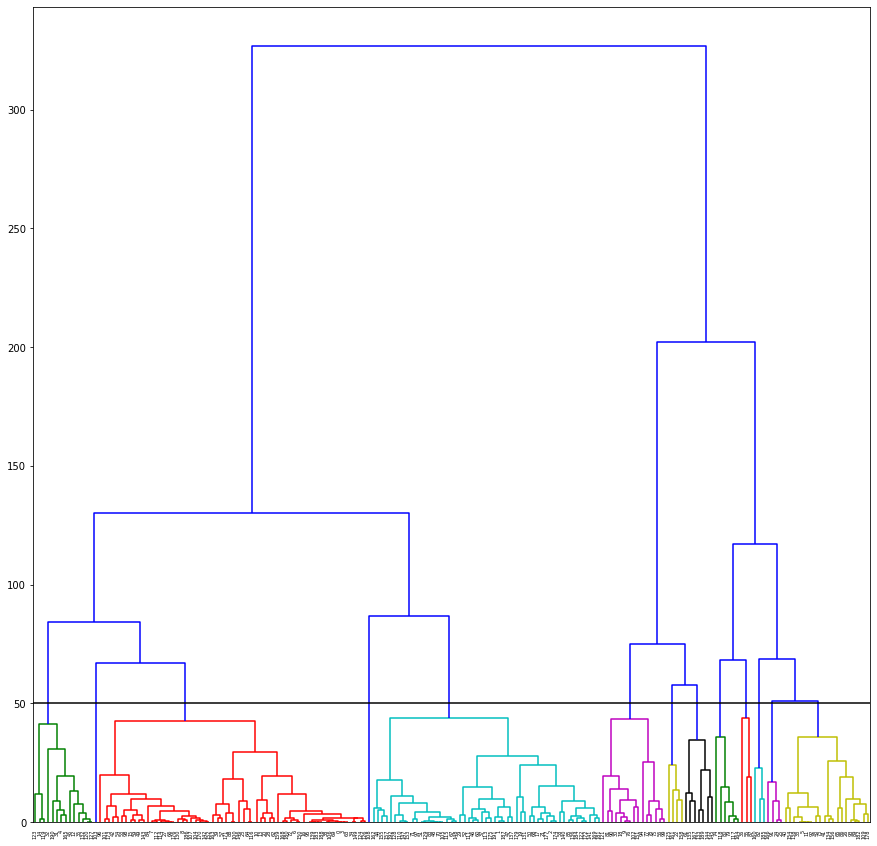

In [39]:
plt.figure(figsize=(15, 15))
dendrogram(Z, color_threshold=50)
plt.axhline(y=50, c='k')
plt.show()
# Уже чуть лучше.

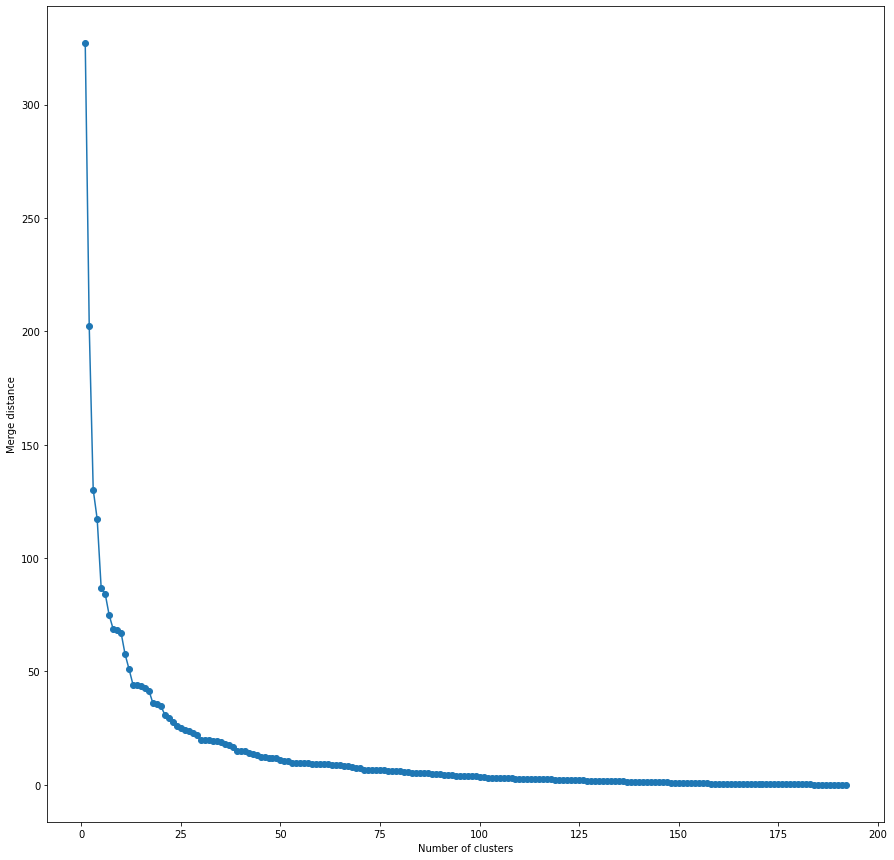

In [40]:
# Посмотрим на локоть, чтобы определиться с числом кластеров. 

def plotElbow(Z, h=15, w=15):
    plt.figure(figsize=(h, w))
    plt.plot(np.array(range(1, np.shape(Z)[0]+1)), 
             Z[:,2][::-1], 
             marker='o')
    plt.xlabel("Number of clusters")
    plt.ylabel("Merge distance")
    plt.show()

plotElbow(Z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (33) found smaller than n_clusters (34). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (37) found smaller than n_clusters (38). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (48) found smaller than n_clusters (49). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (94) found smaller than n_clusters (95). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ConvergenceWarning: Number of distinct clusters (107) found smaller than n_clusters (108). Possibly due to duplicate points in X.
  
/usr/local/lib/python3.

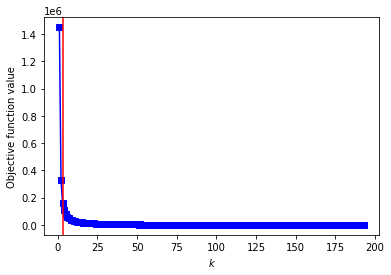

In [42]:
# Посмотри на "идельное" кол-во кластеров, где наибольший угол локтя
# при k-means.

inertia = []
for k in range(1, data.shape[0]+1):
    Z = KMeans(n_clusters=k, 
               init = 'random',
               n_init = 100,
               max_iter = 1000).fit(data)
    inertia.append(Z.inertia_)

plt.plot(range(1, data.shape[0]+1), inertia, 'bo-', marker='s')
plt.xlabel('$k$')
plt.ylabel('Objective function value')
plt.axvline(x=3, c='r')
plt.show()

# +- 10 кластеров.

## K-Means + Визуализация

In [43]:
model = KMeans(n_clusters=10, 
               random_state=42,
               init='random',
               max_iter=1000)

model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [44]:
model.cluster_centers_

array([[ -31.55538875,  152.40541125],
       [  35.45822645,  -91.8169529 ],
       [  34.96472095, -119.8413419 ],
       [  15.43406636,   34.63896455],
       [  21.26152   ,  155.515135  ],
       [  40.84880593,  -76.56825815],
       [  46.878695  ,    3.80882188],
       [  14.91628   ,  105.66646346],
       [ -28.23726923,  -63.38473   ],
       [  19.35130132,  -79.65825289]])

In [0]:
coordinates = []

for coor in model.cluster_centers_:
  coordinates.append((coor[0], coor[1]))

latitudes, longitudes = np.array(coordinates).T

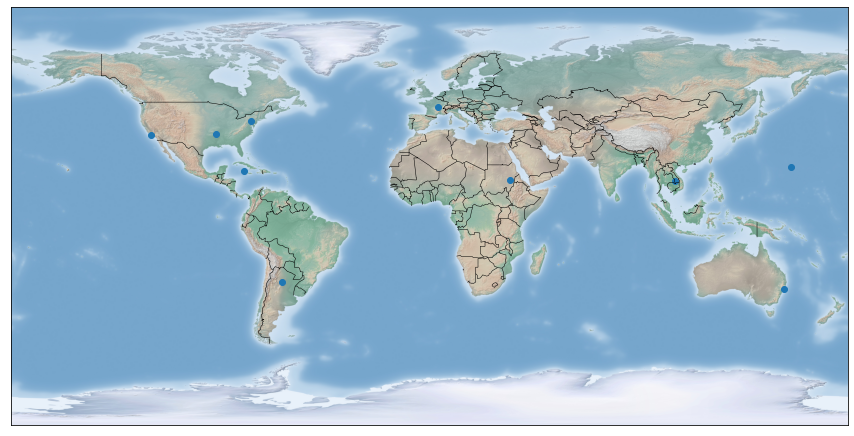

In [46]:
# Посмотрим на центры кластеров на карте.

fig = plt.figure(figsize=(15, 15))

map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.drawcountries()

map_plotter.shadedrelief()
plt.show()

# Не очень: целых 4 кластера на Сев. Америку. 

In [56]:
# Уменьшим кол-во кластеров до 6.

model = KMeans(n_clusters=6, 
               random_state=42,
               init='random',
               max_iter=1000)

model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=1000,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [57]:
model.cluster_centers_

array([[-27.26148889, 154.51372889],
       [ 33.65452654, -90.90736364],
       [-12.88641174, -67.57669043],
       [ 16.501136  ,  45.563864  ],
       [ 15.02236087, 112.37168261],
       [ 46.878695  ,   3.80882188]])

In [0]:
coordinates = []

for coor in model.cluster_centers_:
  coordinates.append((coor[0], coor[1]))

latitudes, longitudes = np.array(coordinates).T

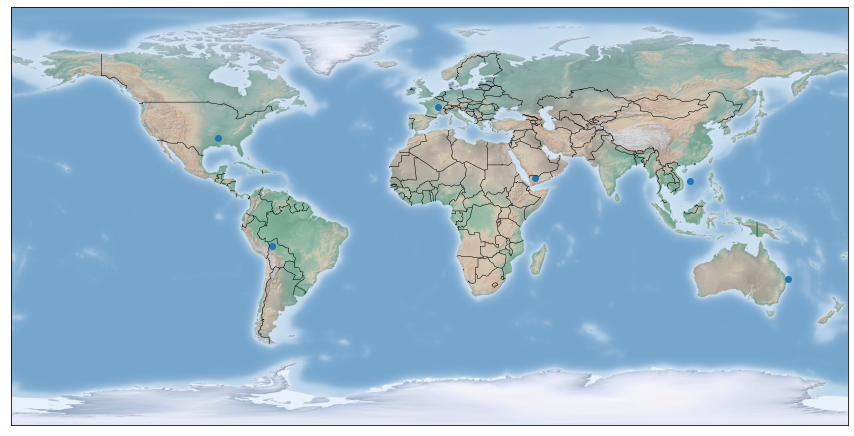

In [59]:
fig = plt.figure(figsize=(15, 15))

map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.drawcountries()

map_plotter.shadedrelief()
plt.show()

# Уже больше похоже на правду.

In [51]:
data.head()

,latitude,longitude
Miami Beach,25.79065,-80.13005
Dallas,32.78306,-96.80667
Atlanta,33.74900,-84.38798
Brownsville,25.82176,-80.24116
San Juan,-31.53750,-68.53639


In [60]:
latitudes, longitudes = data['latitude'], data['longitude']

np.unique(model.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

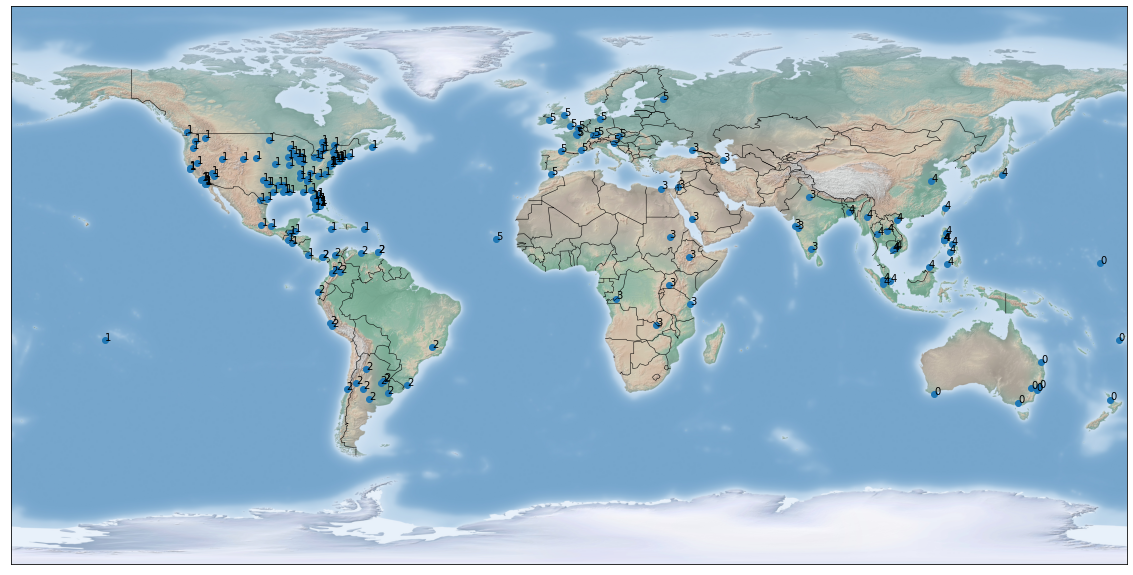

In [61]:
# Провизуализируем кластеры на карте, чтобы посмотреть на ошибки.

fig = plt.figure(figsize=(20, 20))

map_plotter.scatter(longitudes, latitudes, latlon=True)
map_plotter.drawcountries()

map_plotter.shadedrelief()

labels = list(model.labels_)
for label, xpt, ypt in zip(labels, longitudes, latitudes):
    plt.text(xpt, ypt, label)

plt.show()

# Очень и очень хорошо!
# Не видно явных ошибок (разве что одной 1 в океане и 5 в центре), 
# все кластеры явно видны и логичны + нет смешивания. 

## "Интересные" выводы

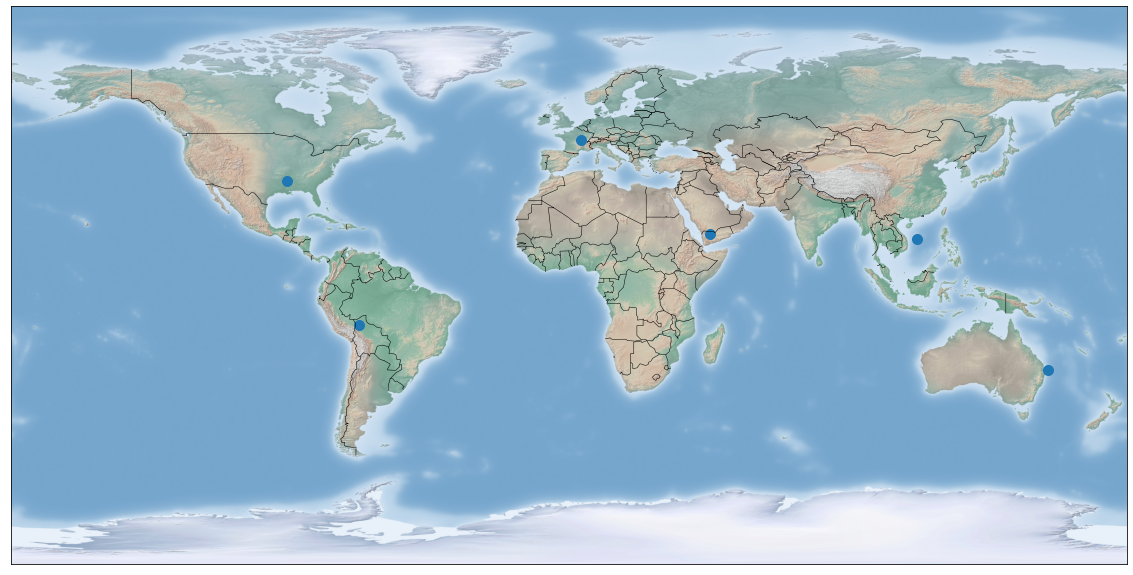

In [63]:
# Ещё раз визуализация выбранной модели и центров кластеров.

model = KMeans(n_clusters=6, 
               random_state=42,
               init='random',
               max_iter=1000)

model.fit(data)

coordinates = []

for coor in model.cluster_centers_:
  coordinates.append((coor[0], coor[1]))

latitudes, longitudes = np.array(coordinates).T

fig = plt.figure(figsize=(20, 20))

map_plotter.scatter(longitudes, latitudes, latlon=True, s=100)
map_plotter.drawcountries()

map_plotter.shadedrelief()
plt.show()

* Даже простой K-Means сработал очень хорошо - из-за однозначных признаков и простого подсчёта расстояния между объектами;
* При учёте скошенности выборки (много объектов из Сев. Америки) - можно сказать о хорошей работе алгоритма: удалось отделить объекты друг от друга, центры кластеров находятся далеко друг от друга;
* Лучшим оказалось разбиение на 6 кластеров - логично исходя из устройства Земли.